# Análise dos dados de acervo das bibliotecas da UFRN

In [1]:
import re
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

## Junção dos datasets

In [2]:
# Arquivos da pasta de datasets
files = listdir('data')
# Regex para cada tipo de dataset que possui vários arquivos
regex = {
    'discentes': re.compile(r'discentes-20[0-9]{2}'),
    'emprestimos': re.compile(r'emprestimos-20[0-9]{3}'),
}
# Filtros aplicados, lista de arquivos que satisfazem os regex
files_filter = {
    'discentes': list(filter(regex['discentes'].search, files)),
    'emprestimos': list(filter(regex['emprestimos'].search, files)),
}
# Mostra ambas as listas de arquivos
print(files_filter)

{'discentes': ['discentes-2012.csv', 'discentes-2017.csv', 'discentes-2013.csv', 'discentes-2010.csv', 'discentes-2018.csv', 'discentes-2014.csv', 'discentes-2015.csv', 'discentes-2016.csv', 'discentes-2009.csv', 'discentes-2011.csv'], 'emprestimos': ['emprestimos-20111.csv', 'emprestimos-20172.csv', 'emprestimos-20021.csv', 'emprestimos-20012.csv', 'emprestimos-20141.csv', 'emprestimos-20081.csv', 'emprestimos-20132.csv', 'emprestimos-20152.csv', 'emprestimos-20061.csv', 'emprestimos-20131.csv', 'emprestimos-20042.csv', 'emprestimos-20091.csv', 'emprestimos-20162.csv', 'emprestimos-20051.csv', 'emprestimos-20002.csv', 'emprestimos-20022.csv', 'emprestimos-20161.csv', 'emprestimos-20121.csv', 'emprestimos-20071.csv', 'emprestimos-20151.csv', 'emprestimos-20122.csv', 'emprestimos-20092.csv', 'emprestimos-20052.csv', 'emprestimos-20171.csv', 'emprestimos-20031.csv', 'emprestimos-20142.csv', 'emprestimos-20112.csv', 'emprestimos-20101.csv', 'emprestimos-20032.csv', 'emprestimos-20062.csv'

In [3]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Variável com os dataframes que iremos usar
dfs = {
    'discentes': make_df(files_filter['discentes']),
    'emprestimos': make_df(files_filter['emprestimos']),
    'cursos': pd.read_csv('data/cursos-ufrn.csv', sep=';'),
    'exemplares': pd.read_csv('data/exemplares.csv', sep=';')
}

In [4]:
dfs['emprestimos'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558703 entries, 0 to 2558702
Data columns (total 8 columns):
id_emprestimo           int64
codigo_barras           object
data_renovacao          object
data_emprestimo         object
data_devolucao          object
nome_usuario            object
id_vinculo_usuario      float64
tipo_vinculo_usuario    object
dtypes: float64(1), int64(1), object(6)
memory usage: 156.2+ MB


Iremos realizar uma análise com o objetivo de descobrirmos os meses que mais ocorrem a realização de empréstimos de livros na UFRN. Para isso, iremos fazer uso da coluna **data_emprestimo**, que contêm a data em que o empréstimo foi realizado.

In [5]:
# Convertemos a coluna data_emprestimo de object para datetime
dfs['emprestimos']['data_emprestimo'] = pd.to_datetime(dfs['emprestimos']['data_emprestimo'])

# Coluna do mês do emprestimo
dfs['emprestimos']['mes_emprestimo'] = dfs['emprestimos']['data_emprestimo'].dt.month

# Contagem de emprestimos por mês
count_mes = dfs['emprestimos'].groupby('mes_emprestimo')['id_emprestimo'].count()

# Labels de cada mês
labels_mes = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril',
    'Maio', 'Junho', 'Julho', 'Agosto',
    'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]

A variável **count_mes** contêm a quantidade de empréstimos de cada mês: temos os meses usando **.keys()** e a quantidade de empréstimos usando **.values**. A variável **labels_mes** serve para termos o nome de cada mês e melhorar a nossa visualização na hora de constuirmos o gráfico.

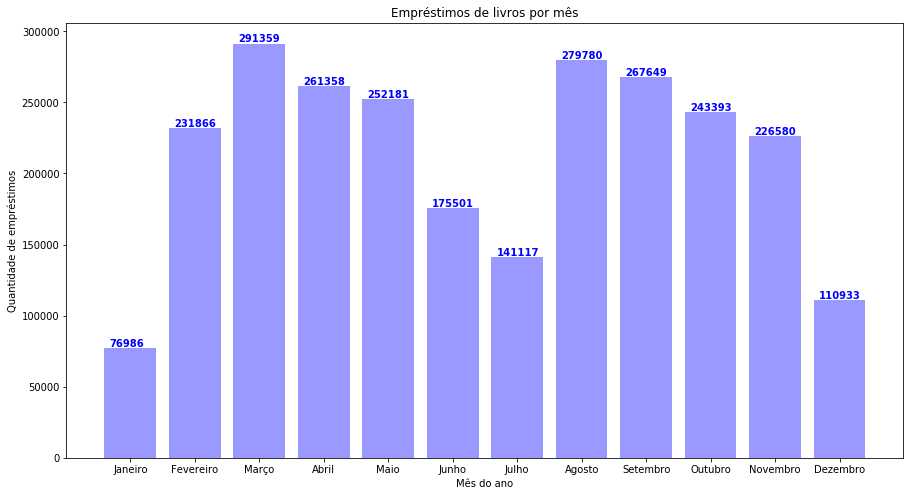

In [7]:
# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

# Barras de cada mês com a quantidade de empréstimos
plt.bar(count_mes.keys(), count_mes.values, alpha=0.4, color='b')

# Labels com os valores de cada barra um pouco acima delas
for index, value in enumerate(count_mes):
    plt.text((index+0.68), (value+1000), str(value), color='blue', fontweight='bold')
    
# Demais configurações do gráfico
plt.xlabel('Mês do ano')
plt.ylabel('Quantidade de empréstimos')
plt.title('Empréstimos de livros por mês')
plt.xticks(list(count_mes.keys()), labels_mes)

# Exibindo o gráfico
plt.show()

Através do gráfico de barra apresentado anteriormente, podemos notar que os meses com maior quantidade de empréstimos de livros são: Março(291359 empréstimos) e Agosto(279780 empréstimos), que são inícios de período, ou seja, ainda na primeira unidade da disciplina. Portanto, podemos dizer que quem normalmente faz empréstimo de livro na UFRN, pega ainda no início das aulas.

Agora iremos analisar os livros perdidos pelos usuário que realizam o empréstimo. Para isso, iremos usar a coluna **data_devolucao** que contêm a data que o livro foi devolvido. Se essa coluna estiver vazia, signifaca que não houve devolução do livro.

In [8]:
# Pegamos os emprestimos que não tiveram devolução
df_devolucao_na = dfs['emprestimos'][dfs['emprestimos']['data_devolucao'].isna()]

# Agrupamos e verificamos o maior grupo
df_devolucao_na_group = df_devolucao_na.groupby('tipo_vinculo_usuario')['id_emprestimo'].count()

Na variável **df_devolucao_na_group** temos a quantidade de livros perdidos de cada mês: temos os meses usando **.keys()** e a quantidade de livros não devolvidos usando **.values**.

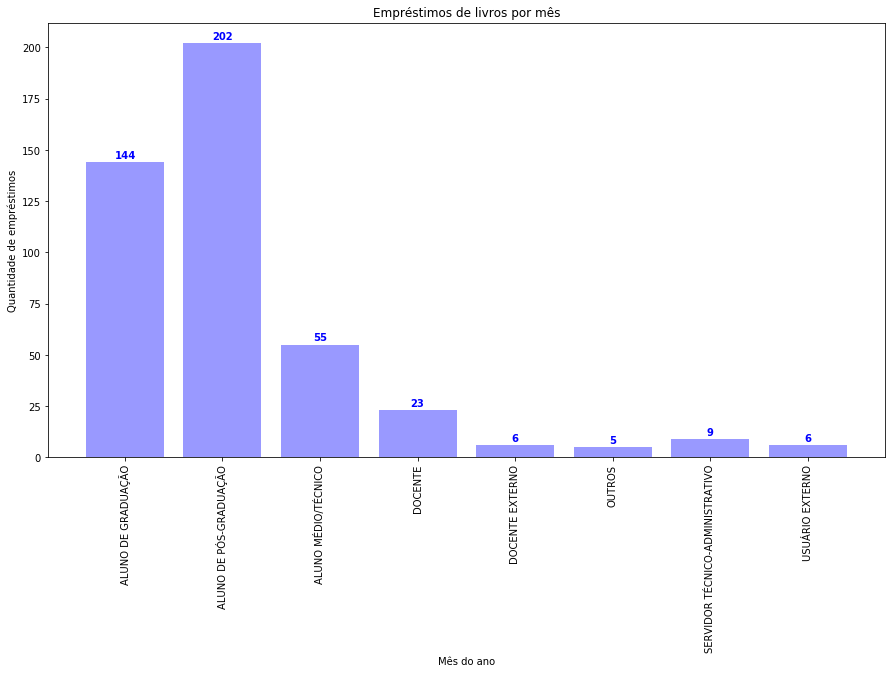

In [9]:
# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

# Barra dos que possuem o auxílio
plt.bar(df_devolucao_na_group.keys(), df_devolucao_na_group.values, alpha=0.4, color='b')

# Valores
for index, value in enumerate(df_devolucao_na_group):
    plt.text((index-(len(str(value))*0.035)), (value+2), str(value), color='blue', fontweight='bold')
    
# Demais configurações do gráfico
plt.xlabel('Mês do ano')
plt.ylabel('Quantidade de empréstimos')
plt.title('Empréstimos de livros por mês')
plt.xticks(rotation=90)

# Exibimos todos os gráficos de uma só vez
plt.show()

Podemos ver que quem mais perde livros são os alunos de pós-graduação, seguidos dos alunos de graduação.